Part 1: WeatherPy
Create a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you’ll be utilizing a simple Python library, Citipy, and the OpenWeatherMap API.

The first requirement is to create a series of scatter plots to showcase the relationships between location and temperature, humidity, wind speed, and cloudiness.

The second requirement is to run linear regression on each relationship for the northern and southern hemispheres.
Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
To fulfill the first requirement, you'll use the OpenWeatherMap API to retrieve weather data from the cities list generated in the starter code. Next, you'll create a series of scatter plots to showcase the following relationships:

Latitude vs. Temperature

Latitude vs. Humidity

Latitude vs. Cloudiness

Latitude vs. Wind Speed

Requirement 2: Compute Linear Regression for Each Relationship.
To fulfill the second requirement, compute the linear regression for each relationship. Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude). You may find it helpful to define a function in order to create the linear regression plots.

Part 2: VacationPy
In this deliverable, you'll use your weather data skills to plan future vacations. Also, you'll use Jupyter notebooks, the geoViews Python library, and the Geoapify API.

The code needed to import the required libraries and load the CSV file with the weather and coordinates data for each city created in Part 1 is provided to help you get started.

Your main tasks will be to use the Geoapify API and the geoViews Python library and employ your Python skills to create map visualizations.

To succeed on this deliverable of the assignment, open the VacationPy.ipynb starter code and complete the following steps:

Create a map that displays a point for every city in the city_data_df DataFrame as shown in the following image. The size of the point should be the humidity in each city.
Narrow down the city_data_df DataFrame to find your ideal weather condition. For example:

A max temperature lower than 27 degrees but higher than 21

Wind speed less than 4.5 m/s

Zero cloudiness


In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import libraries and api keys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy
from datetime import datetime
import scipy.stats as st
# API key for openweathermaps
from config_ow import api_key

In [3]:
# Generate a list of cities by randomly arranging longitude and latitudes

# Empty lists
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

np.random.seed(1234)

# Pull 1500 random samples of lat and lng
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Translate lat and lngs to cities
for i in lat_lngs:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    # Keep only if city name is unique
    if city not in cities:
        cities.append(city)

# Print count and city names
print(len(cities))
print(cities)

590
['adamstown', 'jinghong', 'taulaga', 'bethel', 'gaspe', 'constantia', 'tsiombe', 'berezovyy', 'iskateley', 'port mathurin', 'abepura', 'nagqu', 'shelbyville', 'jamestown', 'taiohae', 'garissa', 'port-aux-francais', 'kodiak', 'isafjordur', 'walvis bay', 'zhanjiang', 'waitangi', 'hammerfest', 'idri', 'ripky', 'margaret river', 'mejit', 'ta`u', 'schonkirchen', 'port alfred', "la'ie", 'gilgit', 'yellowknife', 'west island', 'olonkinbyen', 'ushuaia', 'grytviken', 'san felipe', 'guerrero negro', 'akropong', 'crane', 'san jose de feliciano', 'san antonio de pale', 'edinburgh of the seven seas', 'saint-francois', 'coahuayana de hidalgo', 'puerto natales', 'al jawf', 'saudarkrokur', 'shimanovsk', 'ust-nera', 'tiksi', 'klyuchi', 'pandaria', 'kindu', 'port elizabeth', 'uturoa', 'albany', 'yuzhno-kurilsk', 'markapur', 'east london', 'ilulissat', 'flying fish cove', 'mata-utu', 'saipan', 'haiku-pauwela', 'yamada', 'nayoro', 'la ronge', 'stanley', 'puerto san carlos', 'tangalle', 'alvaraes', 'be

In [4]:
# Compile weather data using OpenWeatherMap api

# Base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + api_key

# Initialize list
city_data = []

# Create counters
record_count = 1
set_count = 1

# Loop through all cities
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Build url to send request
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Increment count
    record_count += 1

    # For each of the cities
    try:
        # Send request
        city_weather = requests.get(city_url).json()

        # Receive data from api
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append data to list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # Error handling
    except:
        print("City not found. Skipping...")
        pass
    
    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | jinghong
Processing Record 3 of Set 1 | taulaga
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | gaspe
Processing Record 6 of Set 1 | constantia
Processing Record 7 of Set 1 | tsiombe
Processing Record 8 of Set 1 | berezovyy
Processing Record 9 of Set 1 | iskateley
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | abepura
Processing Record 12 of Set 1 | nagqu
Processing Record 13 of Set 1 | shelbyville
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | garissa
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | walvis bay
Processing Record 21 of Set 1 | zhanjiang
Processing Record 22 of Set 1 | waitangi
Processing Record 23 of Set 1 | hammerfest
Processing Record 24 of

In [5]:
# Print the city count to confirm sufficient count
len(city_data)

570

In [7]:
# Convert raw data to dataframe
city_data_df = pd.DataFrame(city_data)

print(city_data_df.count())

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64


In [29]:
# Top five
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.40,82,91,7.11,PN,1732896621
1,jinghong,21.9910,100.7341,15.59,94,99,1.01,CN,1732896622
2,taulaga,-11.0553,-171.0883,27.87,68,91,3.69,AS,1732896623
3,bethel,41.3712,-73.4140,6.20,70,40,4.12,US,1732896624
4,gaspe,48.8334,-64.4819,1.12,93,100,2.06,CA,1732896625


In [9]:
# Export to csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [10]:
# Read back data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display head
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.40,82,91,7.11,PN,1732896621
1,jinghong,21.9910,100.7341,15.59,94,99,1.01,CN,1732896622
2,taulaga,-11.0553,-171.0883,27.87,68,91,3.69,AS,1732896623
3,bethel,41.3712,-73.4140,6.20,70,40,4.12,US,1732896624
4,gaspe,48.8334,-64.4819,1.12,93,100,2.06,CA,1732896625


Plot the data to show the various relationships:

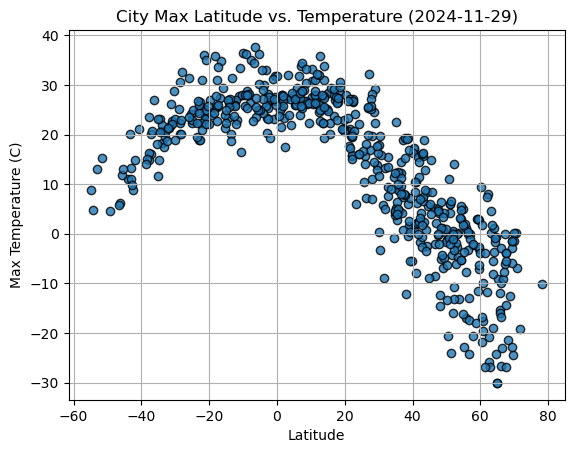

In [12]:
# Associate Latitude and temperature

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save 
plt.savefig("Temp_vs_Lat.png")

# Show plot
plt.show()

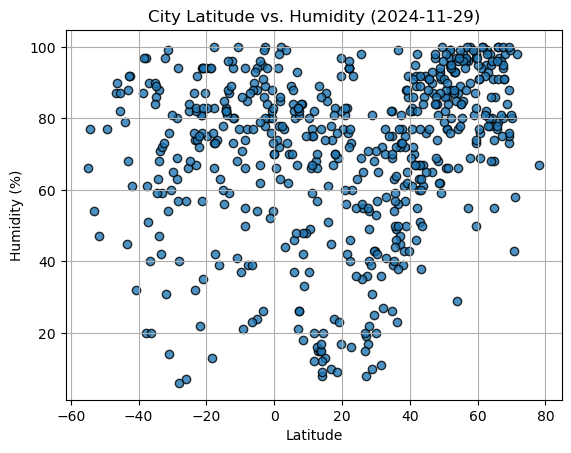

In [13]:
# Associate Latitude and humidity

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save
plt.savefig("Humidity_vs_Lat.png")

# Show plot
plt.show()

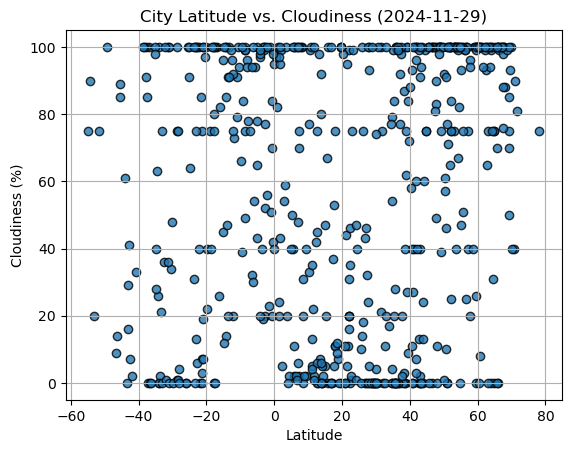

In [14]:
# Associate Latitude and cloudiness

plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save 
plt.savefig("Cloudiness_vs_Lat.png")

# Show plot
plt.show()

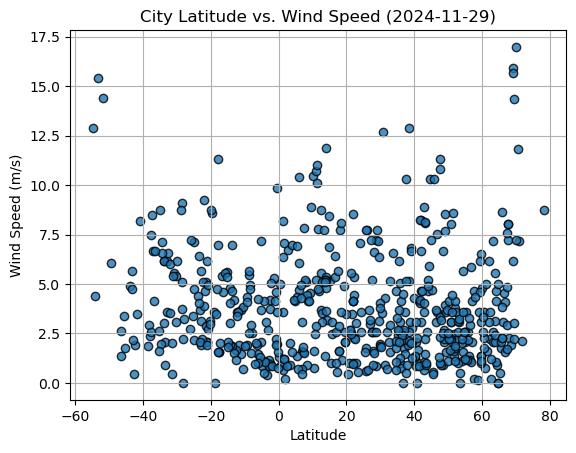

In [15]:
# Associate Latitude and wind speed

plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save
plt.savefig("Windspeed_vs_Lat.png")

# Show plot
plt.show()

Regression analysis for each of the pairs above

In [16]:
# Regression analysis for each of the pairs above.

# Define a function
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [17]:
# Create Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0),:]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jinghong,21.9910,100.7341,15.59,94,99,1.01,CN,1732896622
3,bethel,41.3712,-73.4140,6.20,70,40,4.12,US,1732896624
4,gaspe,48.8334,-64.4819,1.12,93,100,2.06,CA,1732896625
5,constantia,44.1833,28.6500,8.38,86,60,5.21,RO,1732896626
7,berezovyy,51.6667,135.7000,-4.30,97,100,1.35,RU,1732896628


In [18]:
# Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0),:]

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.40,82,91,7.11,PN,1732896621
2,taulaga,-11.0553,-171.0883,27.87,68,91,3.69,AS,1732896623
6,tsiombe,-25.3000,45.4833,24.05,66,100,3.36,MG,1732896627
9,port mathurin,-19.6833,63.4167,24.60,75,22,8.58,MU,1732896631
10,abepura,-2.6333,140.5833,25.45,89,20,1.03,ID,1732896632


The r-value is: 0.7546942860790701


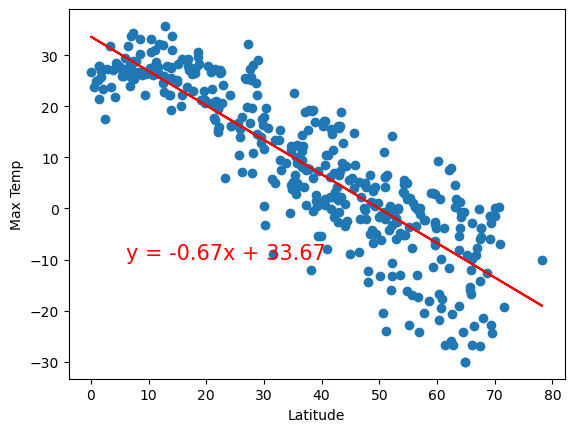

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))

The r-value is: 0.4998906224548749


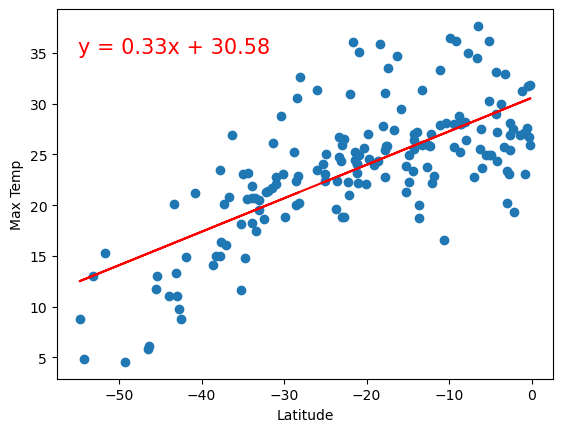

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

The r-value is: 0.1791838761188355


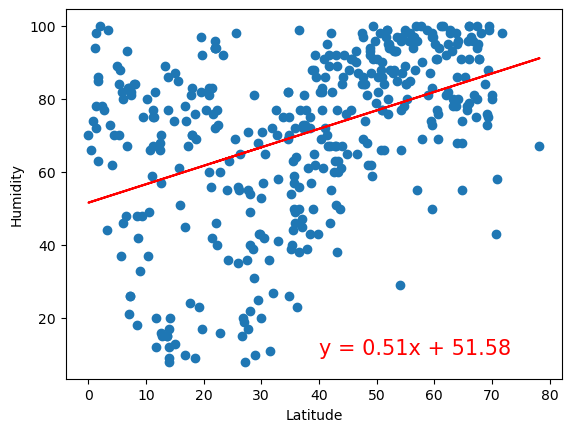

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

The r-value is: 0.012195627631922865


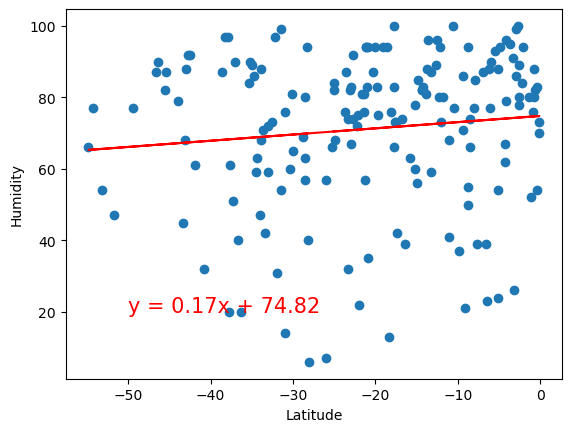

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

The r-value is: 0.1184773149477934


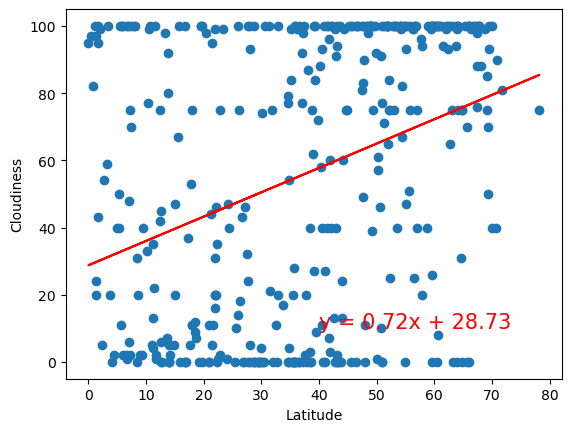

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r-value is: 0.0615745882754956


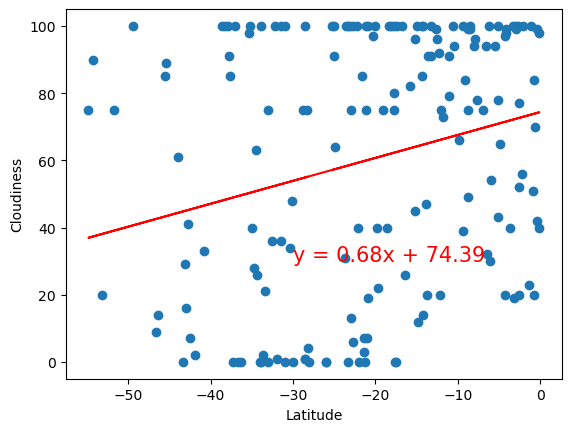

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

The r-value is: 9.257108715614673e-05


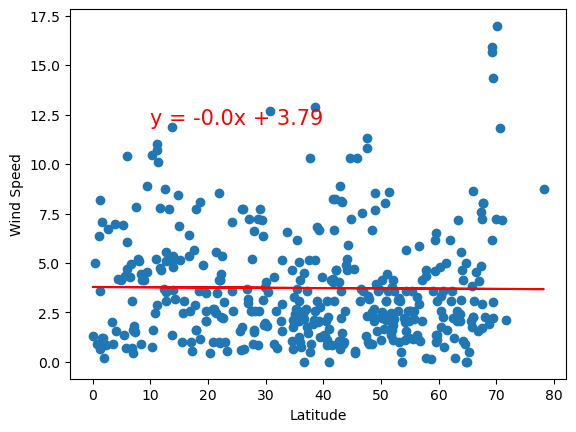

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r-value is: 0.1267475164263418


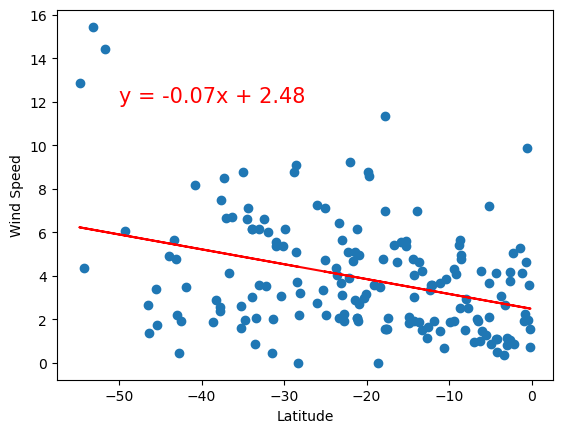

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

In [28]:
city_vaca = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + api_key